In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [141]:
# Patch class for plotting 3D arrows properly, going beyond the limitation
# of defauly quiver plot in 3D with matplotlib.
# Refer to the following link for original codes:
# https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [125]:
X, Y = np.meshgrid(np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05))
Z = X**2 + Y**2 + 20

X1 = np.arange(-5, 5, 1)
Y1 = []
for i in range(len(X1)):
    Y1.append([])
    if X1[i]**2 <= 5:
        Y1[i].append(np.sqrt(5 - X1[i]**2))
        Y1[i].append(-np.sqrt(5 - X1[i]**2))
    if X1[i]**2 <= 15:
        Y1[i].append(np.sqrt(15 - X1[i]**2))
        Y1[i].append(-np.sqrt(15 - X1[i]**2))
    if X1[i]**2 <= 25:
        Y1[i].append(np.sqrt(25 - X1[i]**2))
        Y1[i].append(-np.sqrt(25 - X1[i]**2))
    if X1[i]**2 <= 35:
        Y1[i].append(np.sqrt(35 - X1[i]**2))
        Y1[i].append(-np.sqrt(35 - X1[i]**2))

grad = []
point = []
for i in range(len(X1)):
    for j in range(len(Y1[i])):
        point.append([X1[i], Y1[i][j]])
        norm = np.sqrt(4 * X1[i]**2 + 4 * Y1[i][j]**2)
        grad.append([2 * X1[i] / norm, 2 * Y1[i][j] / norm])

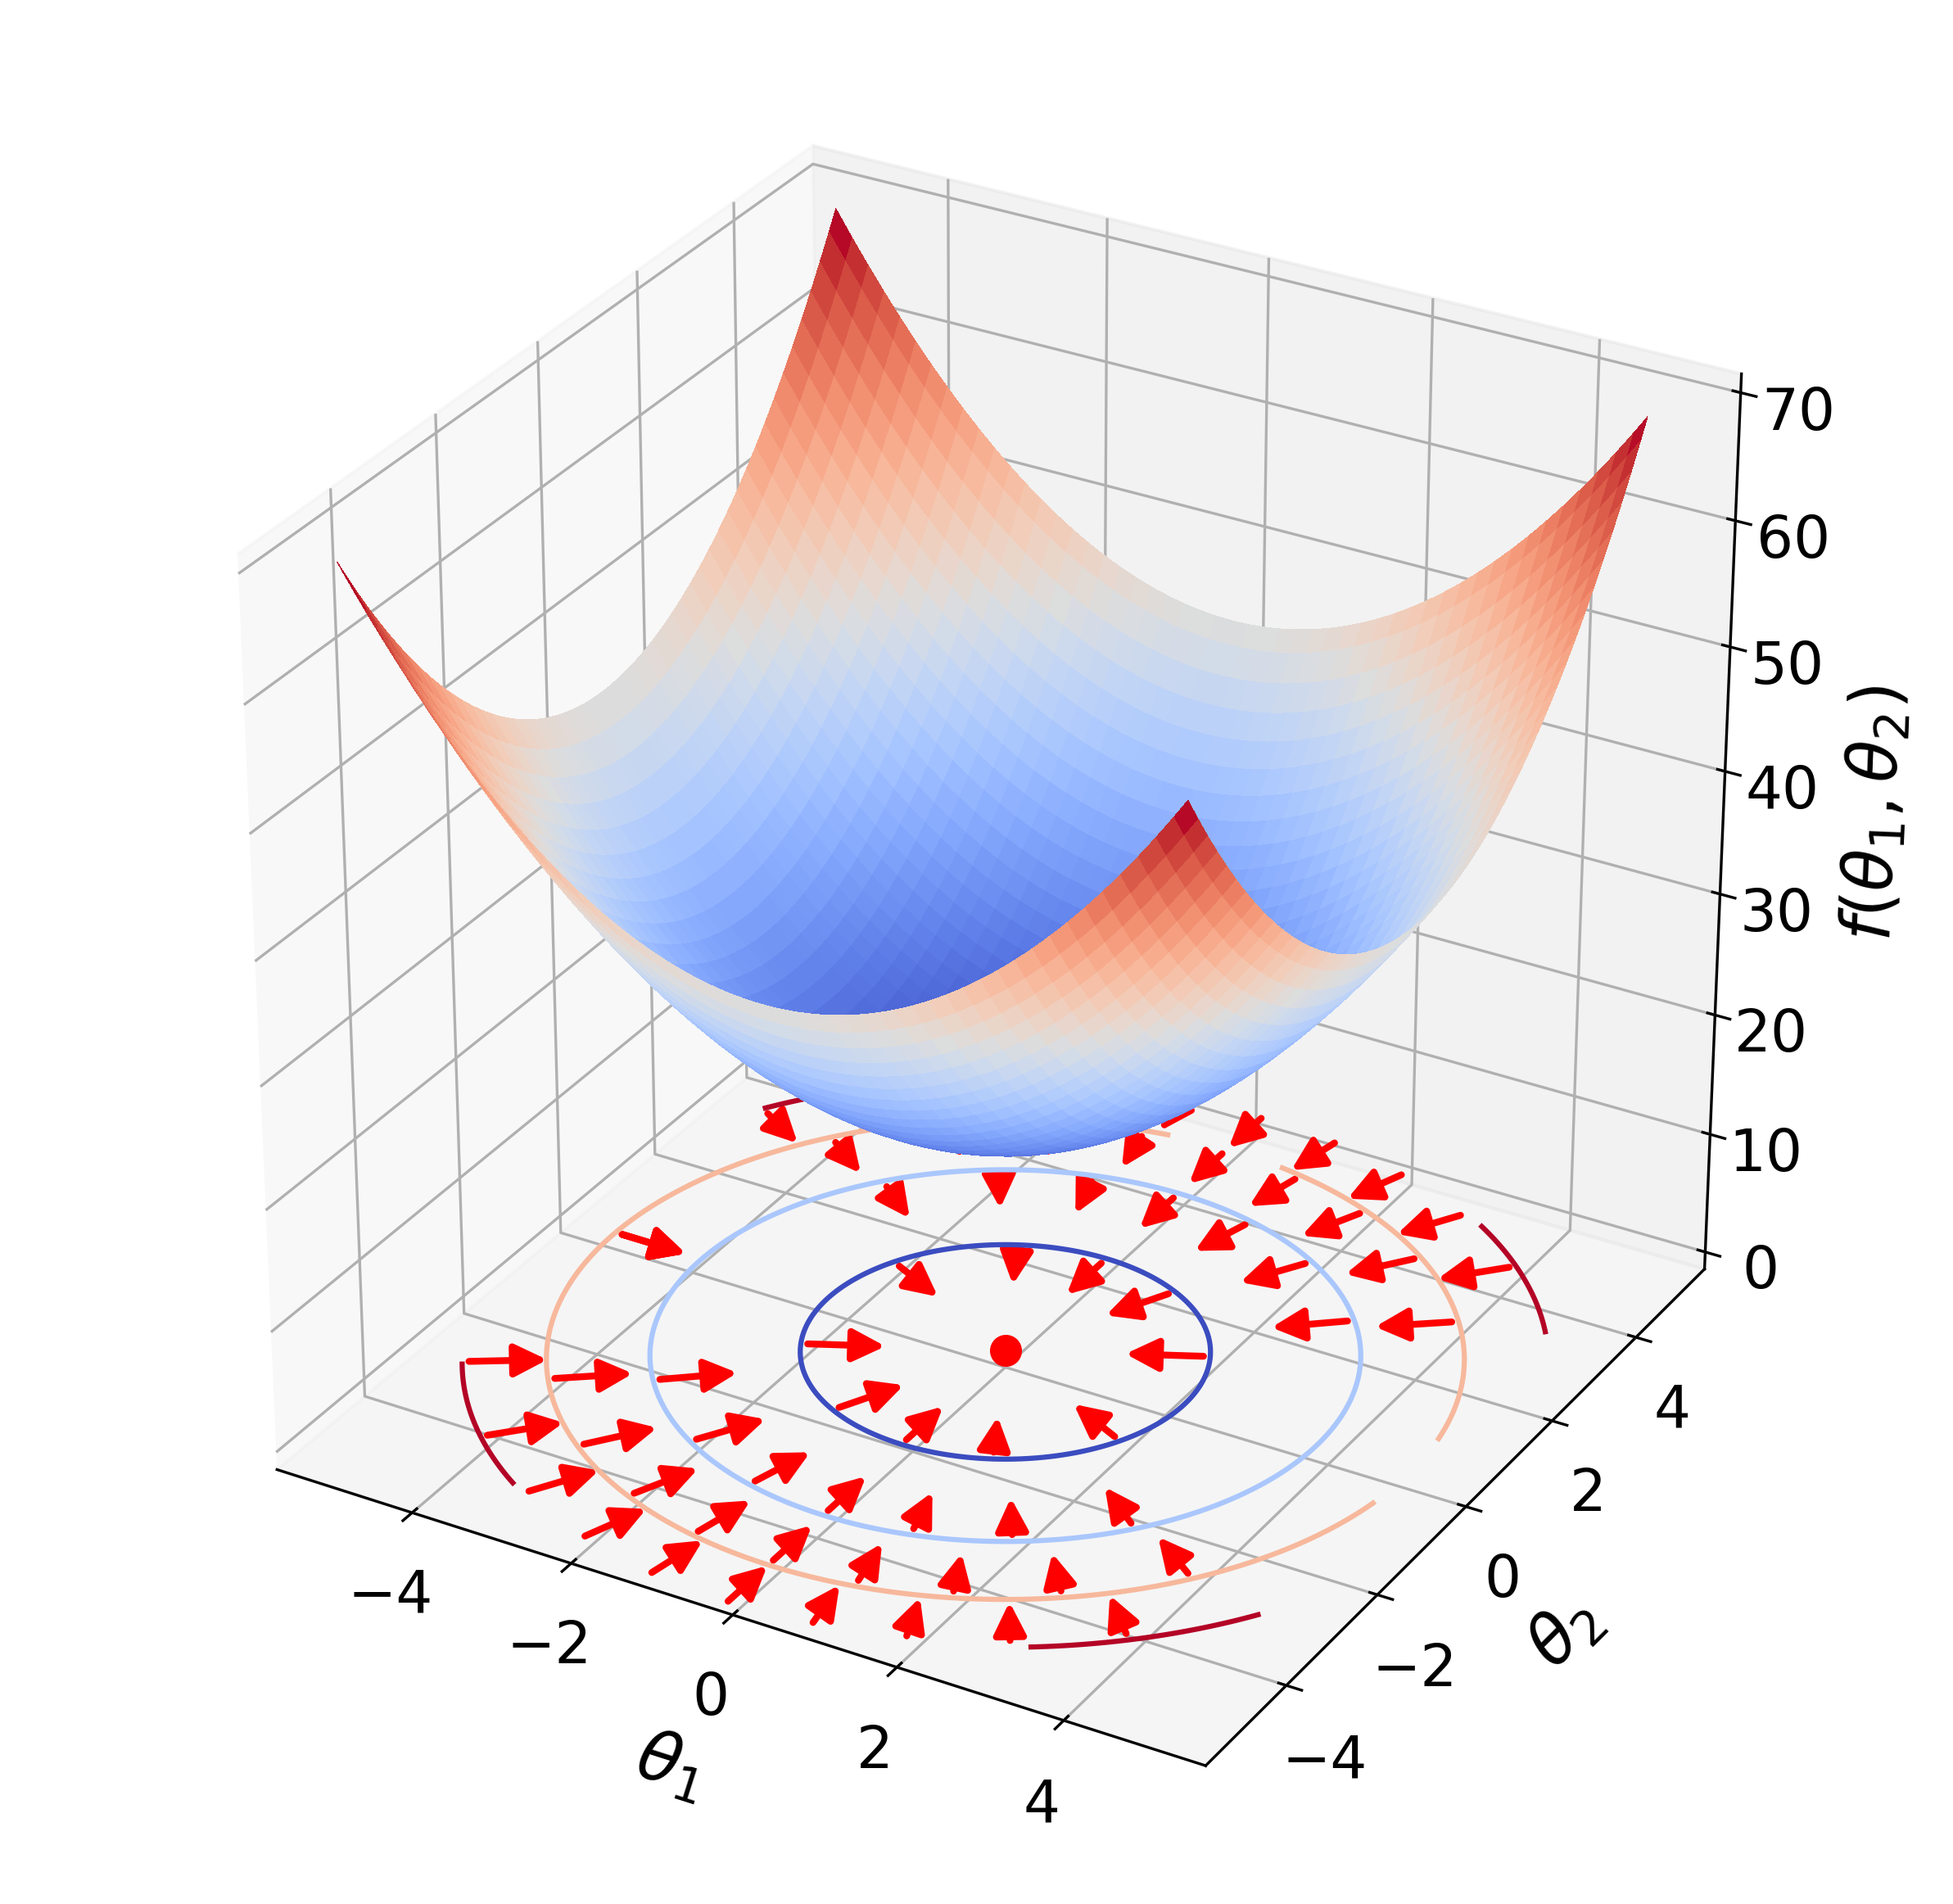

In [140]:
fig = plt.figure(figsize=(10, 10), dpi=300);
ax = fig.gca(projection='3d');
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);
ax.contour(X, Y, Z, np.array([25, 35, 45, 55]), zdir='z', offset=0, cmap=cm.coolwarm)
a = Arrow3D([point[0][0], point[0][0] - grad[0][0]], [point[0][1], point[0][1] - grad[0][1]], 
                [0, 0], mutation_scale=20, 
                lw=2, arrowstyle="-|>", color="r")
ax.add_artist(a)
for i in range(len(point)):
    a = Arrow3D([point[i][0], point[i][0] - grad[i][0]], [point[i][1], point[i][1] - grad[i][1]], 
                [0, 0], mutation_scale=20, 
                lw=2, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.scatter(0, 0, 0, c='r', marker='o', s=70)
    
ax.tick_params(labelsize=17, width=3)
ax.set_xlabel(r'$\theta_1$', fontsize=20, labelpad=10)
ax.set_ylabel(r'$\theta_2$', fontsize=20, labelpad=10)
ax.set_zlabel(r'$f(\theta_1, \theta_2)$', fontsize=20, labelpad=10)
ax.set_zlim(0, 70);

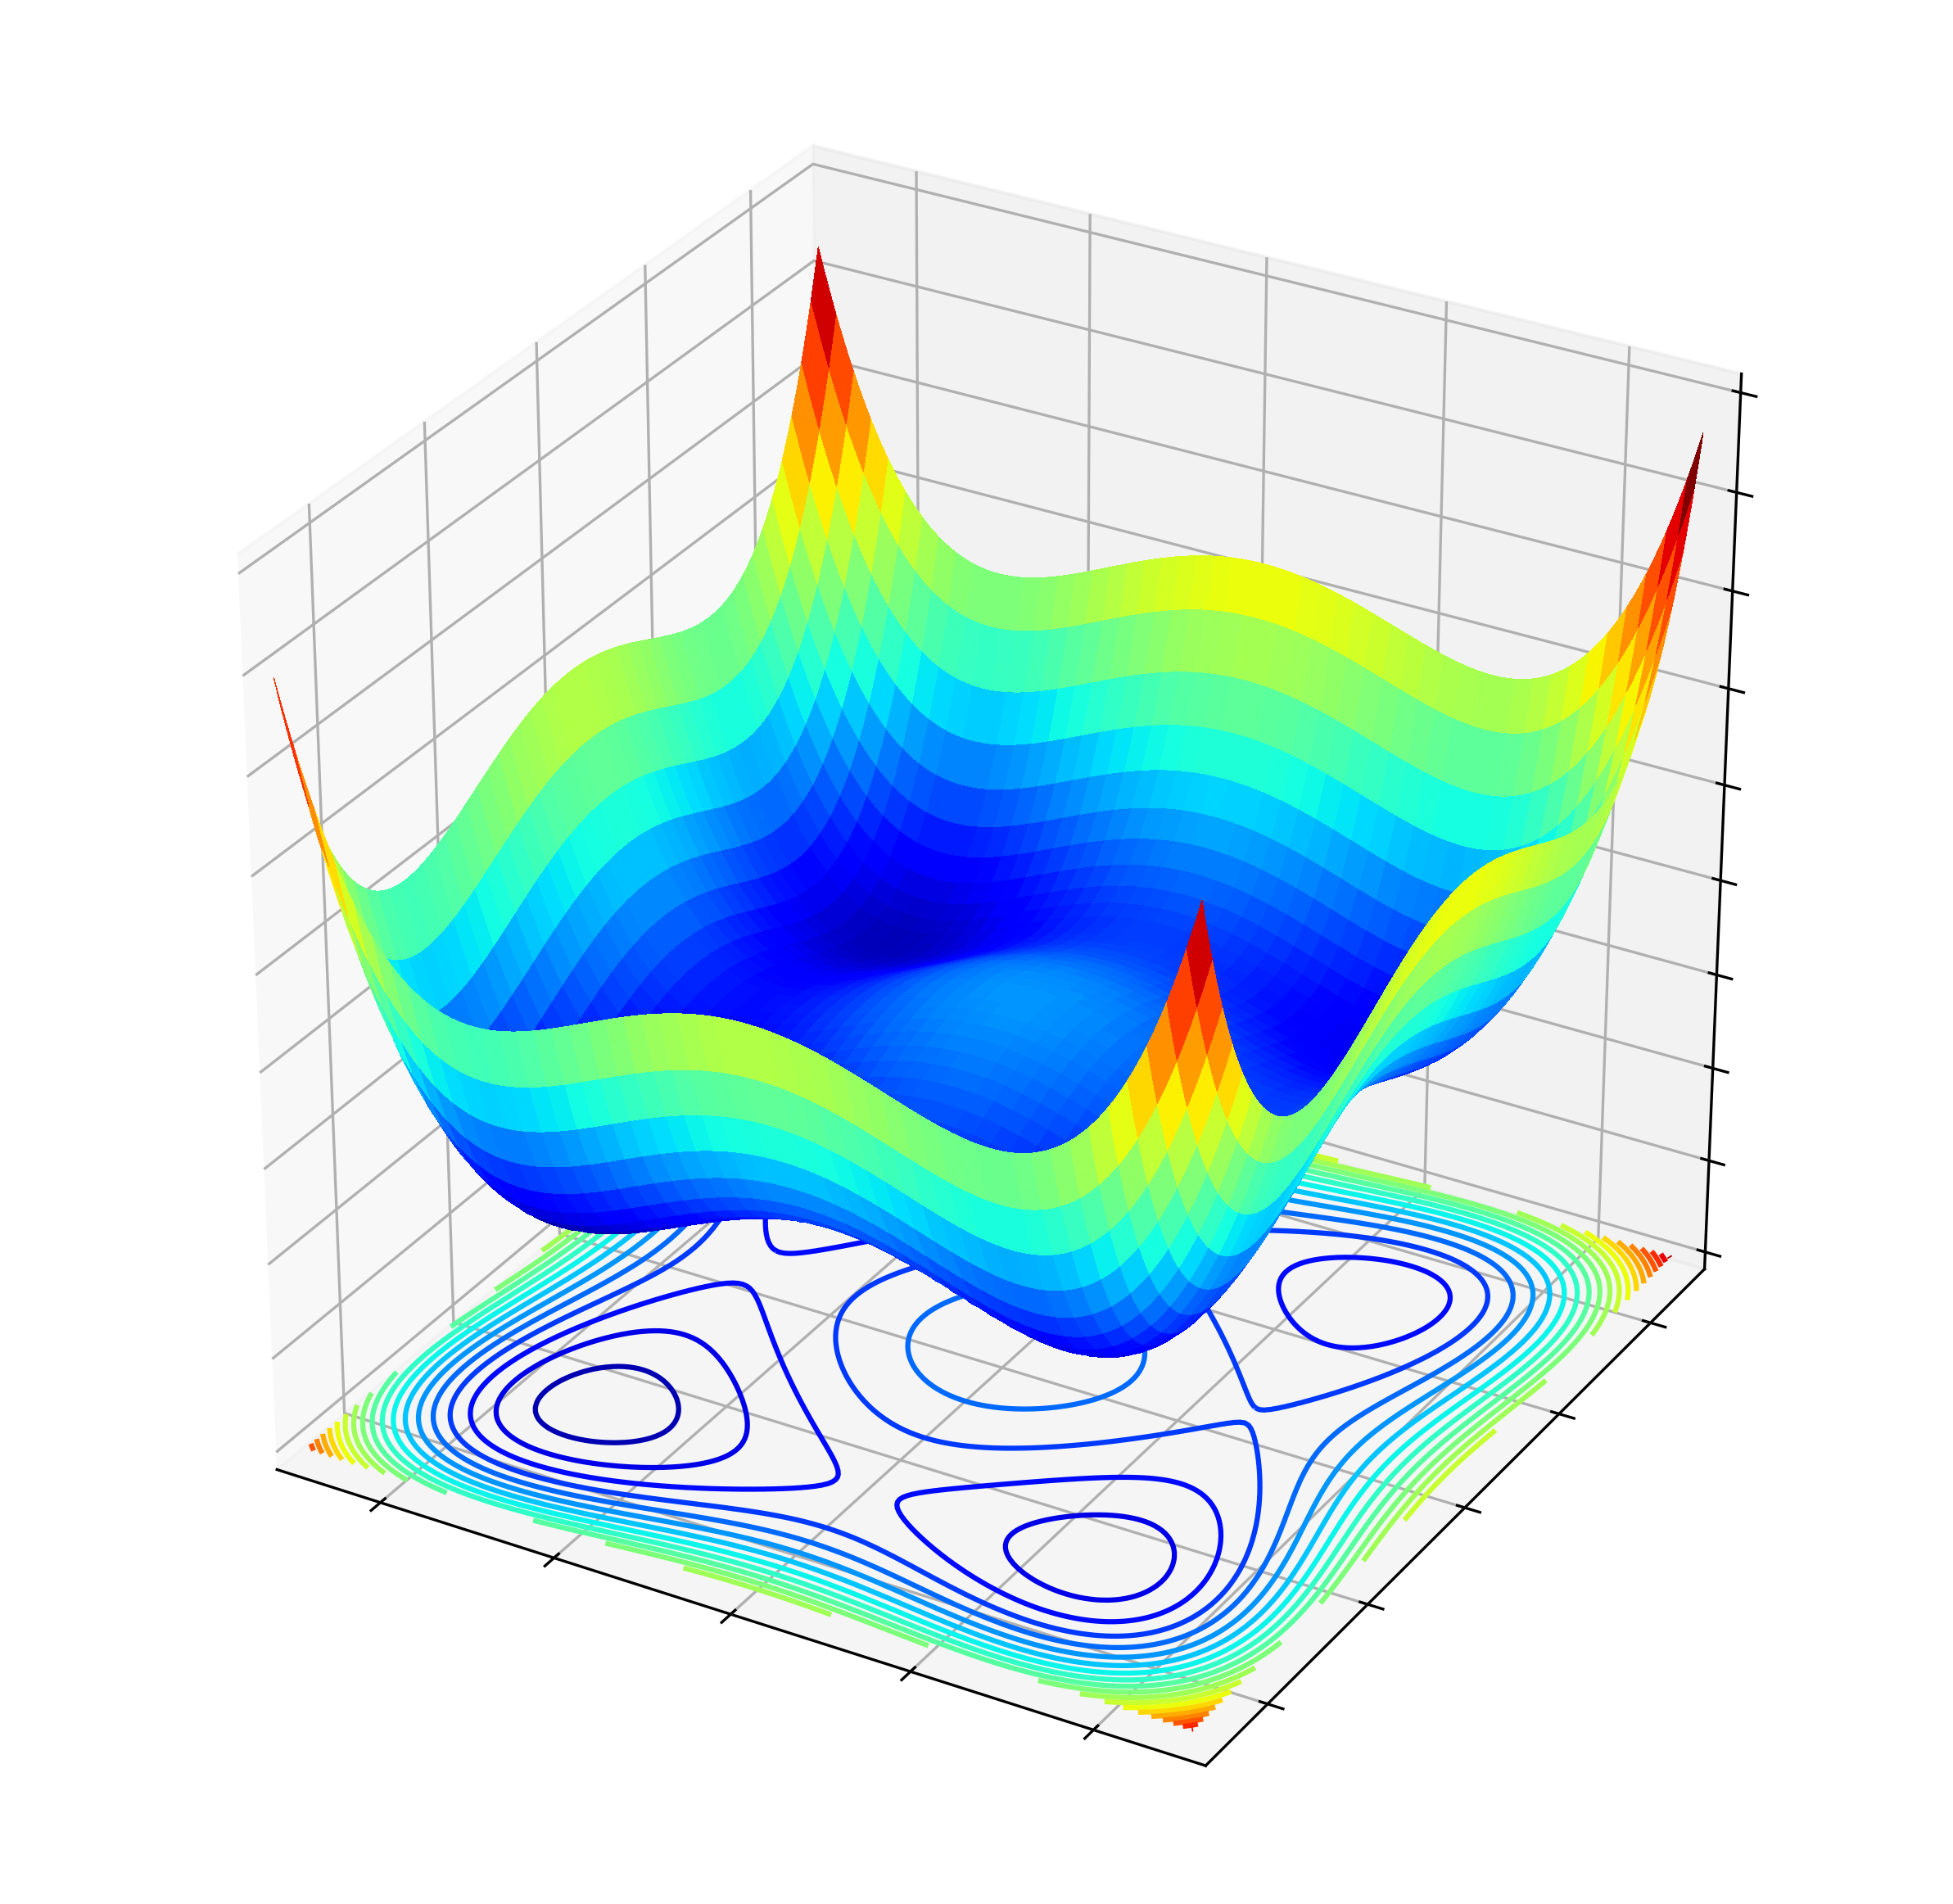

In [3]:
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**4 - 16 * X**2 + 5 * X + Y**4 - 16 * Y**2 + 5 * Y + 350
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=False)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 850)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zticklabels([], visible=False)
ax.set_xticklabels([], visible=False)
ax.set_yticklabels([], visible=False)
ax.contour(X, Y, Z, 20, zdir='z', offset=0, cmap=cm.jet)
ax.tick_params(labelsize=17, width=3)
# ax.view_init(azim=75, elev=35)

plt.show()

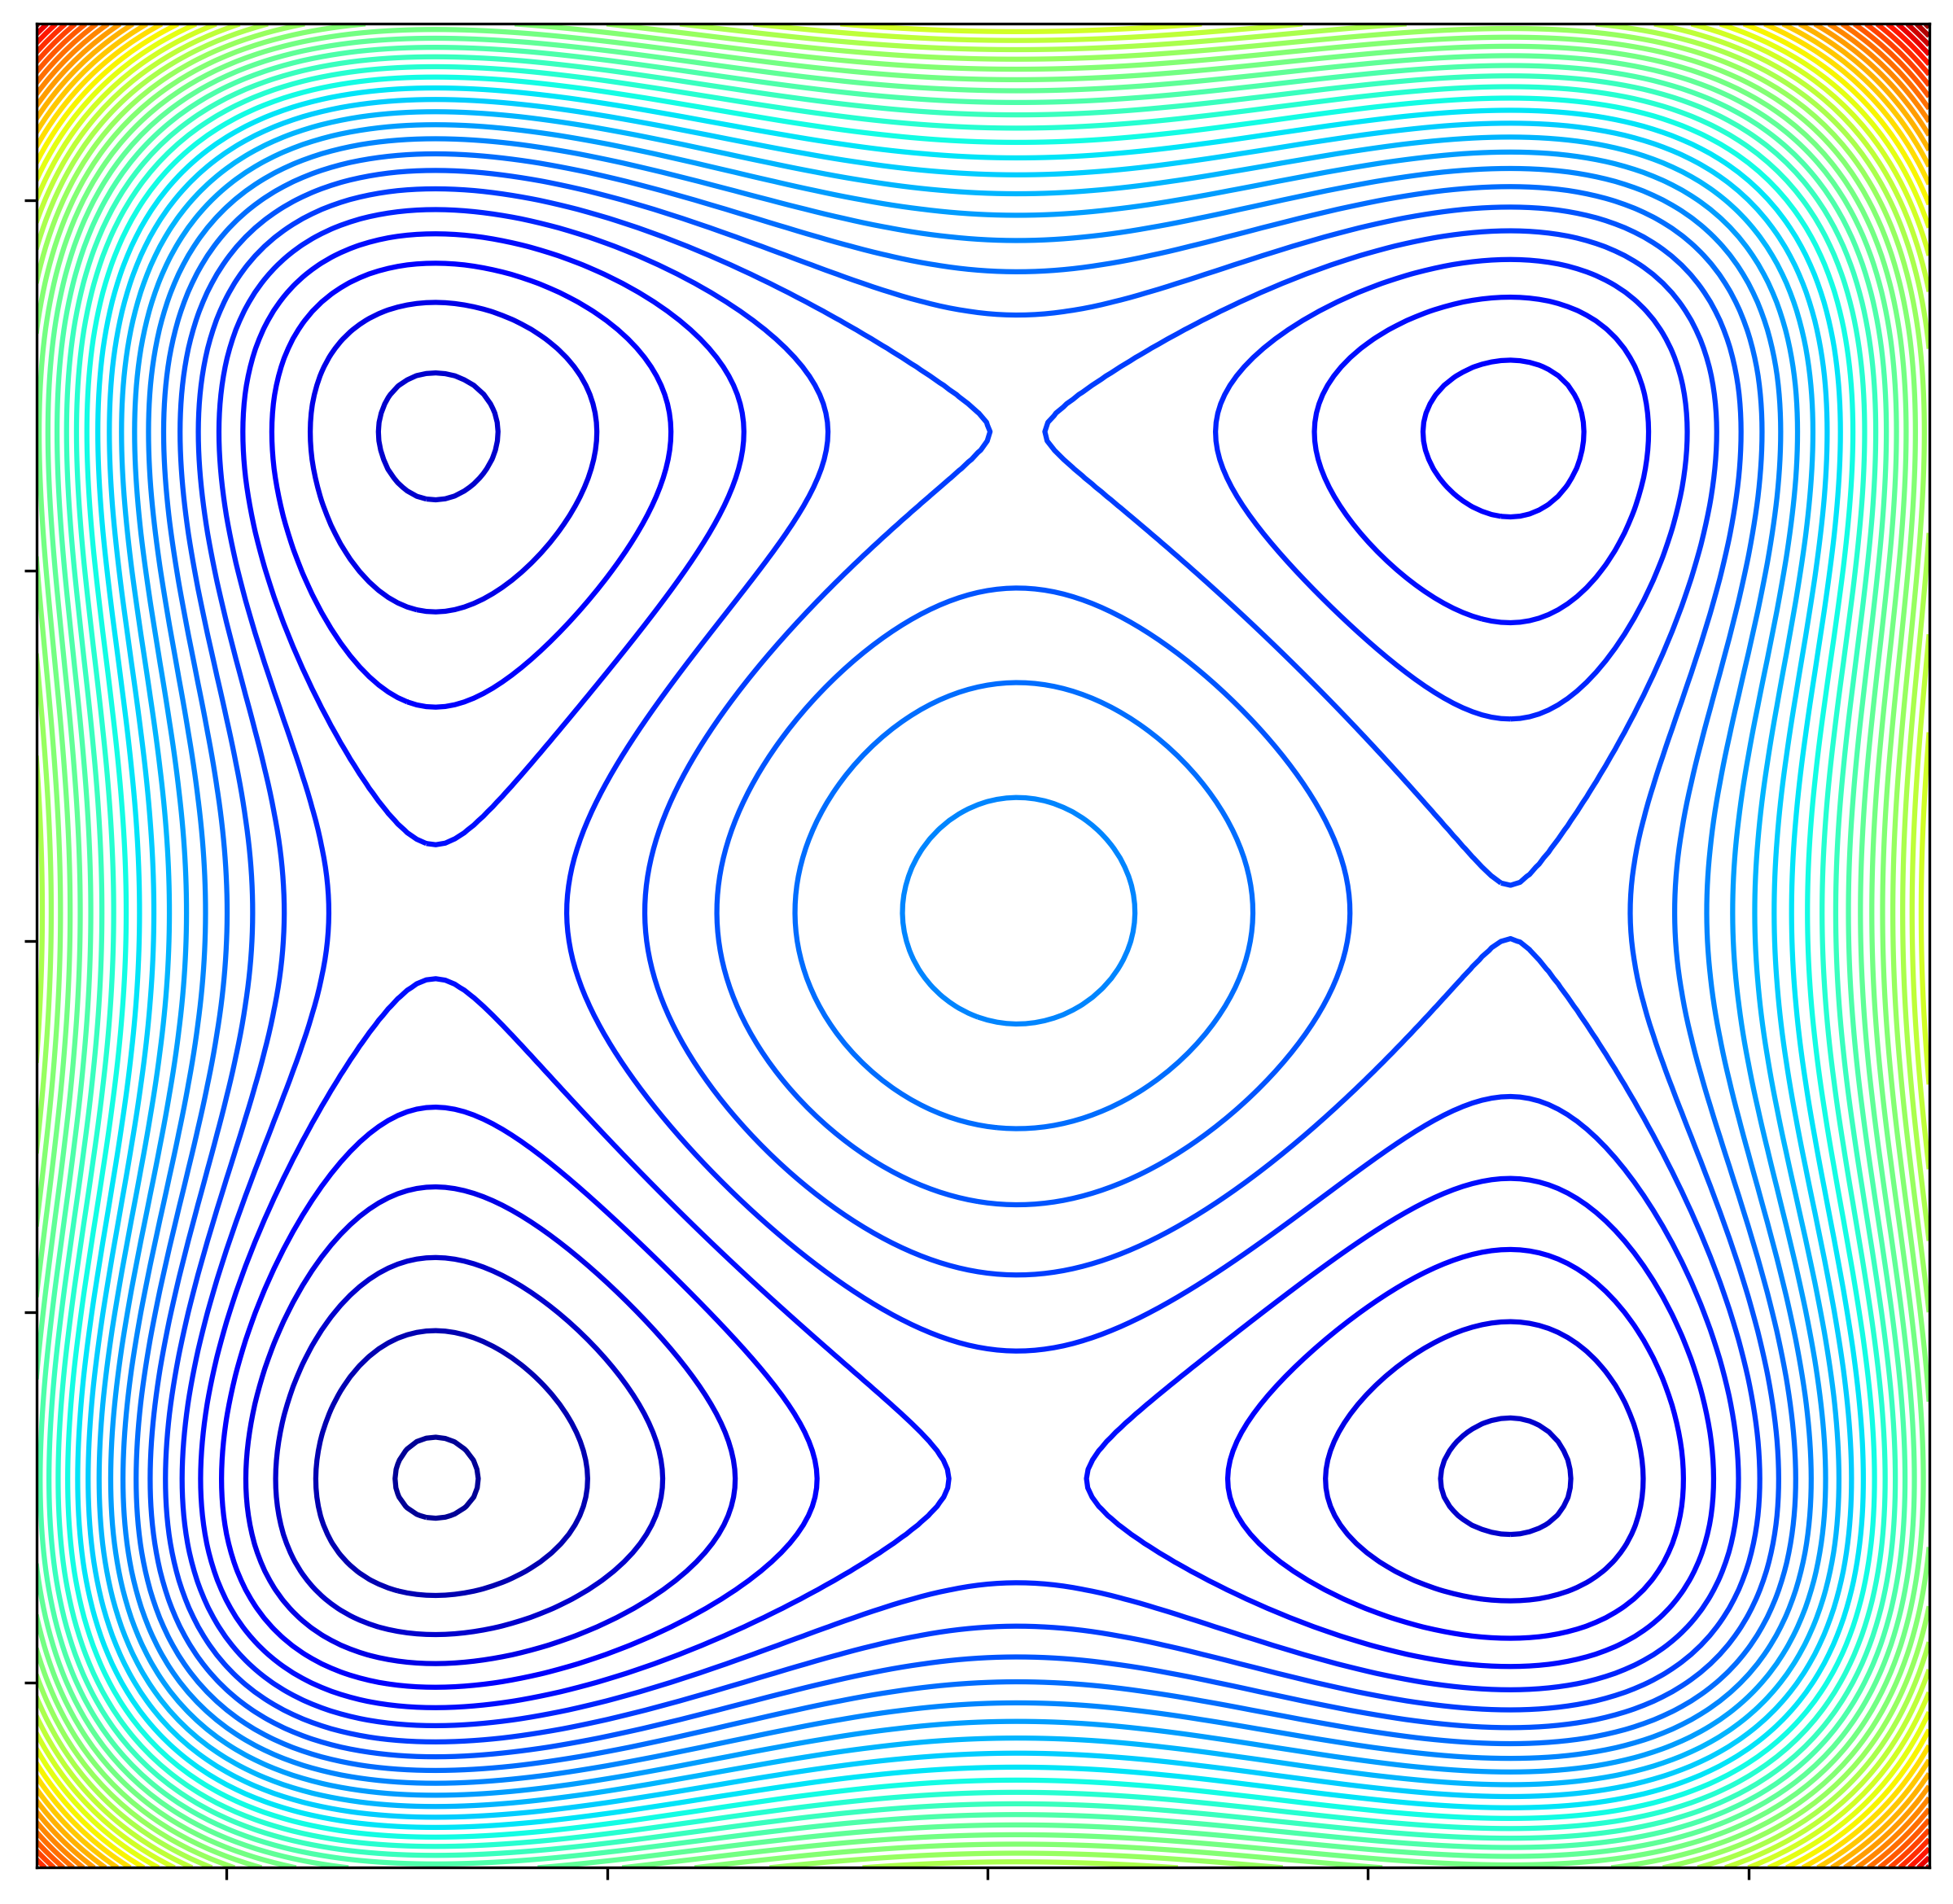

In [8]:
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.gca()
ax.contour(X, Y, Z, 50, cmap=cm.jet)
ax.set_xticklabels([], visible=False)
ax.set_yticklabels([], visible=False)
plt.show()